In [1]:
import MetaTrader5 as mt5
import pandas as pd
import talib
from tqdm import tqdm
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

In [2]:
MA_period = 20
trend_criteria = 2
tp_target = 2

In [3]:
mt5.initialize()

True

In [4]:
rates = mt5.copy_rates_from_pos('XAUUSD', mt5.TIMEFRAME_H1, 0, 20000)
df = pd.DataFrame(rates)
df['time']=pd.to_datetime(df['time'], unit='s')

df.head()

,time,open,high,low,close,tick_volume,spread,real_volume
0,2018-02-15 09:00:00,1354.37,1355.28,1353.82,1353.87,10340,9,0
1,2018-02-15 10:00:00,1353.86,1355.15,1353.52,1354.29,7430,9,0
2,2018-02-15 11:00:00,1354.30,1354.97,1352.43,1352.53,10558,9,0
3,2018-02-15 12:00:00,1352.53,1355.09,1352.23,1354.60,25002,9,0
4,2018-02-15 13:00:00,1354.60,1357.15,1353.89,1356.62,24207,9,0


In [5]:
df['ma'] = talib.SMA(df['close'], timeperiod = MA_period)
df.head(30)

,time,open,high,low,close,tick_volume,spread,real_volume,ma
0,2018-02-15 09:00:00,1354.37,1355.28,1353.82,1353.87,10340,9,0,NaN
1,2018-02-15 10:00:00,1353.86,1355.15,1353.52,1354.29,7430,9,0,NaN
2,2018-02-15 11:00:00,1354.30,1354.97,1352.43,1352.53,10558,9,0,NaN
3,2018-02-15 12:00:00,1352.53,1355.09,1352.23,1354.60,25002,9,0,NaN
4,2018-02-15 13:00:00,1354.60,1357.15,1353.89,1356.62,24207,9,0,NaN
5,2018-02-15 14:00:00,1356.62,1356.72,1353.31,1354.74,15069,9,0,NaN
6,2018-02-15 15:00:00,1354.73,1354.87,1353.25,1353.68,11107,9,0,NaN
7,2018-02-15 16:00:00,1353.67,1353.94,1350.43,1351.04,13368,9,0,NaN
8,2018-02-15 17:00:00,1351.05,1351.68,1348.56,1350.81,17374,9,0,NaN
9,2018-02-15 18:00:00,1350.79,1353.91,1350.47,1352.75,26234,9,0,NaN


In [6]:
position = {'status': 'liquid', 'entry_price': 0, 'close_price': 0, 'tp': 0, 'sl': 0, 'time': 0, 'buy': 0, 'sell': 0}
positions = []

for i, row in tqdm(df.iterrows()):
    if i >= MA_period - 1 + trend_criteria:
        
        #If a long entry is setted
        if position['status'] == 'pending' and position['tp'] > position['sl']:
            if df.loc[i, 'high'] > position['entry_price']:      
                #Open long position
                position['status'] = 'short'
                position['buy'] = position['entry_price']
                print('Long position opened')
                #positions.append(position)
                #position = {'status': 'liquid', 'entry_price': 0, 'close_price': 0, 'tp': 0, 'sl': 0, 'time': 0}
                
            else:
                position = {'status': 'liquid', 'entry_price': 0, 'close_price': 0, 'tp': 0, 'sl': 0, 'time': df.loc[i, 'time'], 'buy': 0, 'sell': 0}
                continue
                
        #If a short entry is setted
        elif position['status'] == 'pending' and position['tp'] < position['sl']:
            if df.loc[i, 'low'] < position['entry_price']:      
                #Open long position
                position['status'] = 'long'
                position['sell'] = position['entry_price']
                print('Long position opened')
                #positions.append(position)
                #position = {'status': 'liquid', 'entry_price': 0, 'close_price': 0, 'tp': 0, 'sl': 0, 'time': 0}
                
            else:
                position = {'status': 'liquid', 'entry_price': 0, 'close_price': 0, 'tp': 0, 'sl': 0, 'time': df.loc[i, 'time'], 'buy': 0, 'sell': 0}
                continue
        
        bu_trend = True
        for k in range(trend_criteria):
            if df.loc[i - k, 'ma'] < df.loc[i - k - 1, 'ma']:
                bu_trend = False
                break
        
        be_trend = True
        if not bu_trend:
            for k in range(trend_criteria):
                if df.loc[i - k, 'ma'] > df.loc[i - k - 1, 'ma']:
                    be_trend = False
                    break
                
        canddle_criteria_bu = (df.loc[i, 'low'] < df.loc[i - 1, 'low']) and (df.loc[i, 'low'] < df.loc[i - 2, 'low'])
        canddle_criteria_be = (df.loc[i, 'high'] < df.loc[i - 1, 'high']) and (df.loc[i, 'high'] > df.loc[i - 2, 'high'])
        
        if bu_trend and canddle_criteria_bu and position['status'] == 'liquid':
            position['entry_price'] = df.loc[i, 'high']
            position['sl'] = df.loc[i, 'low']
            position['status'] = 'pending'
            position['time'] = df.loc[i, 'time']
            position['tp'] = df.loc[i, 'high'] + (df.loc[i, 'high'] - df.loc[i, 'low']) * tp_target
            print('Long pending order setted')
            continue
        elif be_trend and canddle_criteria_be and position['status'] == 'liquid':
            position['entry_price'] = df.loc[i, 'low']
            position['sl'] = df.loc[i, 'high']
            position['status'] = 'pending'
            position['time'] = df.loc[i, 'time']
            position['tp'] = df.loc[i, 'low'] - (df.loc[i, 'high'] - df.loc[i, 'low']) * tp_target
            print('Short pending order setted')
            continue
        
        
        

        
        #If we are long
        if position['status'] == 'long':
            
            #Stop
            if df.loc[i, 'low'] < position['sl']:
                print('Position stopped')
                position['close_price'] = position['sl']
                position['sell'] = position['sl']
                positions.append(position)
                position = {'status': 'liquid', 'entry_price': 0, 'close_price': 0, 'tp': 0, 'sl': 0, 'time': 0, 'buy': 0, 'sell': 0}
                continue
                
            #Take profit
            if df.loc[i, 'high'] >= position['tp']:
                print('Take profit')
                position['close_price'] = position['tp']
                position['sell'] = position['tp']
                positions.append(position)
                position = {'status': 'liquid', 'entry_price': 0, 'close_price': 0, 'tp': 0, 'sl': 0, 'time': 0, 'buy': 0, 'sell': 0}
                continue
                
        #If we are short
        if position['status'] == 'short':
            
            #Stop
            if df.loc[i, 'high'] > position['sl']:
                print('Position stopped')
                position['close_price'] = position['sl']
                position['buy'] = position['sl']
                positions.append(position)
                position = {'status': 'liquid', 'entry_price': 0, 'close_price': 0, 'tp': 0, 'sl': 0, 'time': 0, 'buy': 0, 'sell': 0}
                continue
                
            #Take profit
            if df.loc[i, 'low'] <= position['tp']:
                print('Take profit')
                position['close_price'] = position['tp']
                position['buy'] = position['tp']
                positions.append(position)
                position = {'status': 'liquid', 'entry_price': 0, 'close_price': 0, 'tp': 0, 'sl': 0, 'time': 0, 'buy': 0, 'sell': 0}
                continue

    

940it [00:00, 19.21it/s]

Short pending order setted
Long position opened
Position stopped
Short pending order setted
Long position opened
Take profit
Long pending order setted
Long position opened
Position stopped
Short pending order setted
Long position opened
Take profit
Short pending order setted
Short pending order setted
Short pending order setted
Short pending order setted
Long position opened
Position stopped
Short pending order setted
Long position opened
Position stopped
Short pending order setted
Short pending order setted
Long position opened
Position stopped
Long pending order setted
Long pending order setted
Long pending order setted
Long position opened
Position stopped
Short pending order setted
Long position opened
Position stopped
Short pending order setted
Long pending order setted
Long position opened
Position stopped
Long pending order setted
Long pending order setted
Long pending order setted
Long position opened
Position stopped
Short pending order setted
Long position opened
Position sto

20000it [00:04, 4872.11it/s]


In [7]:
positions = pd.DataFrame(positions)
positions.loc[positions['status'] == 'long', 'Symbol'] = 'triangle-up'
positions.loc[positions['status'] == 'short', 'Symbol'] = 'triangle-down'
positions['Color'] = 'green'
positions = positions[positions.time != 0]
positions.head(4)

,status,entry_price,close_price,tp,sl,time,buy,sell,Symbol,Color
0,short,1355.70,1357.16,1352.78,1357.16,2018-02-16 08:00:00,1357.16,1355.70,triangle-down,green
1,short,1358.45,1354.11,1354.11,1360.62,2018-02-16 15:00:00,1354.11,1358.45,triangle-down,green
2,long,1355.40,1351.44,1363.32,1351.44,2018-02-16 19:00:00,1355.40,1351.44,triangle-up,green
3,short,1346.81,1342.67,1342.67,1348.88,2018-02-19 13:00:00,1342.67,1346.81,triangle-down,green


In [8]:
positions.shape

(22, 10)

In [9]:
#positions = positions.head(5)

In [10]:
'''chart_data = go.Candlestick(x=df['time'], open=df['open'], high=df['high'], low=df['low'], close=df['close'])
fig = go.Figure(data=[chart_data])
ema_trace = go.Scatter(x=df['time'], y=df['ma'], mode='lines', name='ma')
fig.add_trace(ema_trace)

buy_sell_points = go.Scatter(x=positions['time'], y=positions['buy'], mode='markers', name ='markers', marker=go.Marker(size=20, symbol=positions["Symbol"], color=positions["Color"]))
fig.add_trace(buy_sell_points)
                             
fig.show()'''

'chart_data = go.Candlestick(x=df[\'time\'], open=df[\'open\'], high=df[\'high\'], low=df[\'low\'], close=df[\'close\'])\nfig = go.Figure(data=[chart_data])\nema_trace = go.Scatter(x=df[\'time\'], y=df[\'ma\'], mode=\'lines\', name=\'ma\')\nfig.add_trace(ema_trace)\n\nbuy_sell_points = go.Scatter(x=positions[\'time\'], y=positions[\'buy\'], mode=\'markers\', name =\'markers\', marker=go.Marker(size=20, symbol=positions["Symbol"], color=positions["Color"]))\nfig.add_trace(buy_sell_points)\n                             \nfig.show()'

In [11]:
positions.loc[positions['status'] == 'long', 'result'] = positions.loc[positions['status'] == 'long', 'sell'] - positions.loc[positions['status'] == 'long', 'buy']
positions.loc[positions['status'] == 'short', 'result'] = positions.loc[positions['status'] == 'short', 'sell'] - positions.loc[positions['status'] == 'short', 'buy']
positions['cumm_result'] = positions['result'].cumsum()
positions.head()

,status,entry_price,close_price,tp,sl,time,buy,sell,Symbol,Color,result,cumm_result
0,short,1355.70,1357.16,1352.78,1357.16,2018-02-16 08:00:00,1357.16,1355.70,triangle-down,green,-1.46,-1.46
1,short,1358.45,1354.11,1354.11,1360.62,2018-02-16 15:00:00,1354.11,1358.45,triangle-down,green,4.34,2.88
2,long,1355.40,1351.44,1363.32,1351.44,2018-02-16 19:00:00,1355.40,1351.44,triangle-up,green,-3.96,-1.08
3,short,1346.81,1342.67,1342.67,1348.88,2018-02-19 13:00:00,1342.67,1346.81,triangle-down,green,4.14,3.06
4,short,1328.22,1329.71,1325.24,1329.71,2018-02-21 15:00:00,1329.71,1328.22,triangle-down,green,-1.49,1.57


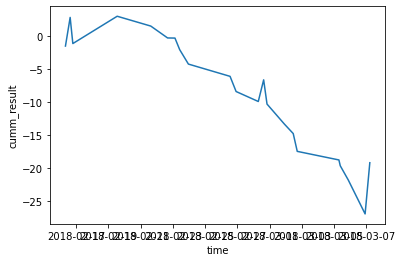

In [12]:
sns.lineplot(data=positions, x="time", y="cumm_result")